<a href="https://colab.research.google.com/github/ppijbb/Python_Notebook/blob/main/keras_cnn_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# keras를 통해 MLP, CNN, RNN을 실습

## MLP 실습

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
print(keras.__version__)
# 랜덤시드 고정시키기
np.random.seed(5)

2.2.5


In [ ]:
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")
dataset.shape   # 당뇨병 발병 여부를 예측가능하도록 구성한 데이터셋을 이용

(768, 9)

In [ ]:
x_train = dataset[:700,0:8] # 768개의 데이터중 700개를 학습 68를 테스트
y_train = dataset[:700,8]   # 마지막 8번째 테이블의 데이터, 당뇨병 발생여부만 y 값으로 가져옴
x_test = dataset[700:,0:8]  # 700번 이후의 데이터 가져옴
y_test = dataset[700:,8]

속성이 8개이기 때문에 입력 뉴런을 8개이고, 이진 분류이기 때문에 0~1사이의 값을 나타내는 출력 뉴런이 1개입니다.

첫번째 Dense 레이어는 은닉층(hidden layer)으로 8개 뉴런을 입력받아 12개 뉴런을 출력합니다.

두번째 Dense 레이어는 은닉층으로 12개 뉴런을 입력받아 8개 뉴런을 출력합니다.

마지막 Dense 레이어는 출럭 레이어로 8개 뉴런을 입력받아 1개 뉴런을 출력합니다.

이 구성을 블록으로 표시해봤습니다. 총 세 개의 Dense 레이어 블록으로 모델을 구성한 다음, 8개의 속성 값을 입력하면 1개의 출력값을 얻을 수 있는 구성입니다.



In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))    # 3줄의 코드로 모델 구성 가능

은닉 레이어의 활성화 함수는 모두 ‘relu’를 사용하였고, 출력 레이어만 0과 1사이로 값이 출력될 수 있도록 활성화 함수를 ‘sigmoid’로 사용하였습니다. 0과 1사이의 실수값이 나오기 때문에 양성 클래스의 확률로 쉽게 매칭할 수 있습니다.

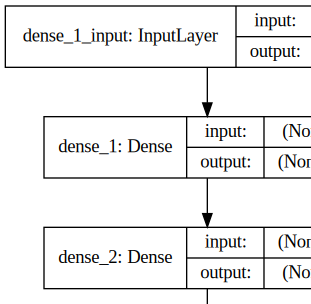

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
model.fit(x_train, y_train, epochs=1500, batch_size=64)
# 64개로 나눈 데이터로 오류 역전파를 통하여 가중치 조절을 시도
# 1500번의 반복학습을 하여 모델을 학습시킴




Epoch 1/1500





700/700 [==============================] - 5s 7ms/step - loss: 4.3543 - acc: 0.6543
Epoch 2/1500
700/700 [==============================] - 0s 60us/step - loss: 3.6562 - acc: 0.6429
Epoch 3/1500
700/700 [==============================] - 0s 58us/step - loss: 3.4548 - acc: 0.6086
Epoch 4/1500
700/700 [==============================] - 0s 57us/step - loss: 3.0922 - acc: 0.6300
Epoch 5/1500
700/700 [==============================] - 0s 53us/step - loss: 2.6192 - acc: 0.6600
Epoch 6/1500
700/700 [==============================] - 0s 61us/step - loss: 2.1177 - acc: 0.6614
Epoch 7/1500
700/700 [==============================] - 0s 56us/step - loss: 1.6645 - acc: 0.6300
Epoch 8/1500
700/700 [==============================] - 0s 53us/step - loss: 1.4018 - acc: 0.5886
Epoch 9/1500
700/700 [==============================] - 0s 56us/step - loss: 1.1983 - acc: 0.6286
Epoch 10/1500
700/700 [==============================] - 0s 65us/step - loss: 1.1127 - acc: 0.6429
Epoch 11/150

In [ ]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 523us/step
acc: 76.47%


## CNN 실습
손으로 그린 이미지를 삼각형, 사각형, 원의 이미지를 구분하여 보자

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

# 랜덤시드 고정시키기
np.random.seed(3)

Using TensorFlow backend.
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

본 예제에서는 패치 이미지 크기를 24 x 24로 하였으니 target_size도 (24, 24)로 셋팅하였습니다. 훈련 데이터 수가 클래스당 15개이니 배치 크기를 3으로 지정하여 총 5번 배치를 수행하면 하나의 epoch가 수행될 수 있도록 하였습니다. 다중 클래스 문제이므로 class_mode는 ‘categorical’로 지정하였습니다. 그리고 제네레이터는 훈련용과 검증용으로 두 개를 만들었습니다.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'datasets/handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'datasets/handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


영상 분류에 높은 성능을 보이고 있는 컨볼루션 신경망 모델을 구성해보겠습니다. 각 레이어들은 이전 강좌에서 살펴보았으므로 크게 어려움없이 구성할 수 있습니다.

  컨볼루션 레이어 : 입력 이미지 크기 24 x 24, 입력 이미지 채널 3개, 필터 크기 3 x 3, 필터 수 32개, 활성화 함수 ‘relu’

  컨볼루션 레이어 : 필터 크기 3 x 3, 필터 수 64개, 활성화 함수 ‘relu’

  맥스풀링 레이어 : 풀 크기 2 x 2

  플래튼 레이어
  댄스 레이어 : 출력 뉴런 수 128개, 활성화 함수 ‘relu’

  댄스 레이어 : 출력 뉴런 수 3개, 활성화 함수 ‘softmax’

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

모델을 정의했다면 모델을 손실함수와 최적화 알고리즘으로 엮어봅니다.

loss : 현재 가중치 세트를 평가하는 데 사용한 손실 함수 입니다. 다중 클래스 문제이므로 ‘categorical_crossentropy’으로 지정합니다.

optimizer : 최적의 가중치를 검색하는 데 사용되는 최적화 알고리즘으로 효율적인 경사 하강법 알고리즘 중 하나인 ‘adam’을 사용합니다.

metrics : 평가 척도를 나타내며 분류 문제에서는 일반적으로 ‘accuracy’으로 지정합니다.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
15/15 [==============================] - 2s 122ms/step - loss: 1.1800 - acc: 0.6444 - val_loss: 0.5919 - val_acc: 1.0000
Epoch 2/50
15/15 [==============================] - 0s 31ms/step - loss: 0.1888 - acc: 1.0000 - val_loss: 0.0822 - val_acc: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 30ms/step - loss: 0.0064 - acc: 1.0000 - val_loss: 0.0769 - val_acc: 0.9333
Epoch 4/50
15/15 [==============================] - 0s 31ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0209 - val_acc: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 31ms/step - loss: 7.6474e-04 - acc: 1.0000 - val_loss: 0.0128 - val_acc: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 31ms/step - loss: 1.5909e-04 - acc: 1.0000 - val_loss: 0.0158 - val_acc: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 28ms/step - loss: 1.4425e-04 - acc: 1.0000 - val_loss

In [ ]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 100.00%


데이터의 출처는 사용자가 그렸던 데이터

데이터의 대표성이 없기에 100%의 정확도가 나왔어도 상용화는 불가능

In [ ]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.000 0.002 0.998]
 [1.000 0.000 0.000]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.041 0.914 0.046]
 [0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 0.002 0.998]
 [0.000 0.000 1.000]
 [0.988 0.001 0.011]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]
 [0.000 0.000 1.000]
 [0.000 1.000 0.000]]


### CNN 데이터셋 부풀리기
Keras의 ImageDataGenerator 함수를 이용하여 이미지 데이터 변형이 가능함

In [ ]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(3)

from keras.preprocessing.image import ImageDataGenerator

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'datasets/hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'datasets/hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5)

# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/200
15/15 [==============================] - 1s 98ms/step - loss: 1.1571 - acc: 0.6444 - val_loss: 1.1662 - val_acc: 0.3333
Epoch 2/200
15/15 [==============================] - 0s 28ms/step - loss: 0.1780 - acc: 1.0000 - val_loss: 3.5206 - val_acc: 0.3333
Epoch 3/200
15/15 [==============================] - 0s 29ms/step - loss: 0.0048 - acc: 1.0000 - val_loss: 4.9047 - val_acc: 0.3333
Epoch 4/200
15/15 [==============================] - 0s 29ms/step - loss: 4.4563e-04 - acc: 1.0000 - val_loss: 5.3819 - val_acc: 0.3333
Epoch 5/200
15/15 [==============================] - 0s 29ms/step - loss: 2.3673e-04 - acc: 1.0000 - val_loss: 5.4950 - val_acc: 0.3333
Epoch 6/200
15/15 [==============================] - 0s 29ms/step - loss: 1.5299e-04 - acc: 1.0000 - val_loss: 5.5422 - val_acc: 0.3333
Epoch 7/200
15/15 [==============================] - 0s 28ms/step - loss: 1.3123e-04 - acc: 1.0000 - val_loss: 5.579

Epoch 120/200
15/15 [==============================] - 0s 33ms/step - loss: 2.9008e-07 - acc: 1.0000 - val_loss: 6.5851 - val_acc: 0.3333
Epoch 121/200
15/15 [==============================] - 0s 28ms/step - loss: 2.8743e-07 - acc: 1.0000 - val_loss: 6.5887 - val_acc: 0.3333
Epoch 122/200
15/15 [==============================] - 0s 27ms/step - loss: 2.8345e-07 - acc: 1.0000 - val_loss: 6.5888 - val_acc: 0.3333
Epoch 123/200
15/15 [==============================] - 0s 31ms/step - loss: 2.7948e-07 - acc: 1.0000 - val_loss: 6.5921 - val_acc: 0.3333
Epoch 124/200
15/15 [==============================] - 0s 26ms/step - loss: 2.7683e-07 - acc: 1.0000 - val_loss: 6.5950 - val_acc: 0.3333
Epoch 125/200
15/15 [==============================] - 0s 26ms/step - loss: 2.7286e-07 - acc: 1.0000 - val_loss: 6.5998 - val_acc: 0.3333
Epoch 126/200
15/15 [==============================] - 0s 26ms/step - loss: 2.6491e-07 - acc: 1.0000 - val_loss: 6.6046 - val_acc: 0.3333
Epoch 127/200
15/15 [=============

수행결과는 40%입니다. 세개 중 하나 찍는 문제인데도 불구하고 50%로 못 넘깁니다. 오버피팅이 제대로 된 모델이라고 볼 수 있습니다.

실행결과 33%가 나옴?

케라스에서는 ImageDataGenerator 함수를 통해서 데이터 부풀리기 기능을 제공합니다.

In [ ]:
import keras
from keras import backend as K

keras.preprocessing.image.ImageDataGenerator(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=0.,
width_shift_range=0.,
height_shift_range=0.,
shear_range=0.,
zoom_range=0.,
channel_shift_range=0.,
fill_mode='nearest',
cval=0.,
horizontal_flip=False,
vertical_flip=False,
rescale=None,
preprocessing_function=None,
data_format=K.image_data_format()
)

In [ ]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
                                   
img = load_img('datasets/hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
for batch in train_datagen.flow(x, batch_size=1, save_to_dir='datasets/preview', save_prefix='tri', save_format='png'):
    i += 1
    if i > 30: 
        break

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.5,
                                   zoom_range=[0.8, 2.0],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

아래의 CNN학습을 노트북에서 실행시 상당한 시간을 요구함

colab에서의 실행을 추천(코드는 이전에 실행했던 CNN학습과 동일)

In [ ]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(3)

from keras.preprocessing.image import ImageDataGenerator

# 데이터셋 불러오기
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'datasets/hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'datasets/hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습시키기
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=200,
        validation_data=test_generator,
        validation_steps=5)

# 모델 평가하기
print("-- Evaluate --")

scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 모델 예측하기
print("-- Predict --")

output = model.predict_generator(
            test_generator, 
            steps = 5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(output)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Epoch 1/200
1500/1500 [==============================] - 44s 29ms/step - loss: 0.1911 - acc: 0.9253 - val_loss: 2.0174 - val_acc: 0.7333
Epoch 2/200
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0369 - acc: 0.9891 - val_loss: 1.5032 - val_acc: 0.7333
Epoch 3/200
1500/1500 [==============================] - 40s 26ms/step - loss: 0.0252 - acc: 0.9942 - val_loss: 1.0888 - val_acc: 0.8000
Epoch 4/200
1500/1500 [==============================] - 40s 26ms/step - loss: 0.0335 - acc: 0.9891 - val_loss: 2.0020 - val_acc: 0.6667
Epoch 5/200
1500/1500 [==============================] - 40s 26ms/step - loss: 0.0164 - acc: 0.9944 - val_loss: 3.0538 - val_acc: 0.6667
Epoch 6/200
1500/1500 [==============================] - 40s 26ms/step - loss: 0.0289 - acc: 0.9927 - val_loss: 1.8734 - val_acc: 0.8000
Epoch 7/200
1427/1500 [===========================>..] - ETA: 1s - loss: 0.0144 - acc: 0.9942

KeyboardInterrupt: 

## RNN 실습
CNN에 비해 순차적이라는 특성을 가짐

순차석 : 이전의 데이터를 전파함

입력형태 : LSTM

동요 '나비야'에서의 다음 음을 예측하는 실습예제를 통해 알아보자

In [ ]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

여기서 우리가 정의한 문제대로 4개 음표 입력으로 다음 출력 음표를 예측하려면, 아래와 같이 데이터셋을 구성합니다.

g8 e8 e4 f8 d8 : 1~4번째 음표, 5번째 음표

e8 e4 f8 d8 d4 : 2~5번째 음표, 6번째 음표

6개의 음표로는 위와 같이 2개의 샘플이 나옵니다. 각 샘플은 4개의 입력 데이터와 1개의 라벨값으로 구성되어 있습니다. 즉 1~4번째 열은 속성(feature)이고, 5번째 열은 클래스(class)를 나타냅니다. 이렇게 4개씩 구간을 보는 것을 윈도우 크기가 4라고 합니다. 그리고 문자와 숫자로 된 음표(코드)로는 모델 입출력으로 사용할 수 없기 때문에 각 코드를 숫자로 변환할 수 있는 사전을 하나 만들어봅니다. 첫번째 사전은 코드를 숫자로, 두번째 사전은 숫자를 코드로 만드는 코드입니다.

In [ ]:
import numpy as np
# 시퀀스에 4개를 주면 다음 4개씩 잘라 붙임
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

시퀀스투데이터셋 함수를 통해서 시퀀스를 5개씩 나눠서 학습할 준비가 됨

In [ ]:
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]


<b>예측 과정</b>
    

예측은 두 가지 방법으로 해보겠습니다. 한 스텝 예측과 곡 전체 예측입니다.

<b>한 스텝 예측</b>

한 스텝 예측이란 실제 음표 4개를 입력하여 다음 음표 1개를 예측하는 것을 반복하는 것입니다. 이 방법에서는 모델의 입력값으로는 항상 실제 음표가 들어갑니다.

모델에 t0, t1, t2, t3를 입력하면 y0 출력이 나옵니다.

모델에 t1, t2, t3, t4를 입력하면 y1 출력이 나옵니다.

모델에 t2, t3, t4, t5를 입력하면 y2 출력이 나옵니다.

이 과정을 y49 출력까지 반복합니다.

<b>곡 전체 예측</b>

곡 전체 예측이란 입력된 초가 4개 음표만을 입력으로 곡 전체를 예측하는 것입니다. 초반부가 지나면, 예측값만으로 모델에 입력되어 다음 예측값이 나오는 식입니다. 그야말로 “나비야~ 나”까지 알려주면 나머지까지 모두 연주를 하는 것이죠. 만약 중간에 틀린 부분이 생긴다면, 이후 음정, 박자는 모두 이상하게 될 가능성이 많습니다. 예측 오류가 누적되는 것이겠죠.

모델에 t0, t1, t2, t3를 입력하면 y0 출력이 나옵니다.

예측값인 y0를 t4라고 가정하고, 모델에 t1, t2, t3, t4을 입력하면 y1 출력이 나옵니다.

예측값인 y1을 t5라고 가정하고, 모델에 t2, t3, t4(예측값), t5(예측값)을 입력하면 y2 출력이 나옵니다.

이 과정을 y49 출력까지 반복합니다.

이를 MLP를 통해서 예측해보자

(50, 5)
[[11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  8]
 [ 8  1  7  8  9]
 [ 1  7  8  9 10]
 [ 7  8  9 10 11]
 [ 8  9 10 11 11]
 [ 9 10 11 11  4]
 [10 11 11  4 11]
 [11 11  4 11  9]
 [11  4 11  9  9]
 [ 4 11  9  9  9]
 [11  9  9  9 10]
 [ 9  9  9 10  8]
 [ 9  9 10  8  1]
 [ 9 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]
 [11  9  9  2  8]
 [ 9  9  2  8  8]
 [ 9  2  8  8  8]
 [ 2  8  8  8  8]
 [ 8  8  8  8  8]
 [ 8  8  8  8  9]
 [ 8  8  8  9  3]
 [ 8  8  9  3  9]
 [ 8  9  3  9  9]
 [ 9  3  9  9  9]
 [ 3  9  9  9  9]
 [ 9  9  9  9  9]
 [ 9  9  9  9 10]
 [ 9  9  9 10  4]
 [ 9  9 10  4 11]
 [ 9 10  4 11  9]
 [10  4 11  9  2]
 [ 4 11  9  2 10]
 [11  9  2 10  8]
 [ 9  2 10  8  1]
 [ 2 10  8  1  7]
 [10  8  1  7  9]
 [ 8  1  7  9 11]
 [ 1  7  9 11 11]
 [ 7  9 11 11  9]
 [ 9 11 11  9  9]
 [11 11  9  9  2]]
one hot encoding vector size is  12
Epoch 1/2000
 - 1s - loss: 2.4744 - acc: 0.1600
Epoch 2

 - 0s - loss: 1.3091 - acc: 0.5000
Epoch 149/2000
 - 0s - loss: 1.3060 - acc: 0.5000
Epoch 150/2000
 - 0s - loss: 1.3048 - acc: 0.5600
Epoch 151/2000
 - 0s - loss: 1.3014 - acc: 0.5200
Epoch 152/2000
 - 0s - loss: 1.2988 - acc: 0.5400
Epoch 153/2000
 - 0s - loss: 1.2967 - acc: 0.5600
Epoch 154/2000
 - 0s - loss: 1.2963 - acc: 0.5400
Epoch 155/2000
 - 0s - loss: 1.3069 - acc: 0.5200
Epoch 156/2000
 - 0s - loss: 1.2880 - acc: 0.5600
Epoch 157/2000
 - 0s - loss: 1.2988 - acc: 0.5600
Epoch 158/2000
 - 0s - loss: 1.2877 - acc: 0.5400
Epoch 159/2000
 - 0s - loss: 1.2837 - acc: 0.5200
Epoch 160/2000
 - 0s - loss: 1.2799 - acc: 0.5400
Epoch 161/2000
 - 0s - loss: 1.2888 - acc: 0.5400
Epoch 162/2000
 - 0s - loss: 1.2788 - acc: 0.5600
Epoch 163/2000
 - 0s - loss: 1.2788 - acc: 0.5400
Epoch 164/2000
 - 0s - loss: 1.2791 - acc: 0.5600
Epoch 165/2000
 - 0s - loss: 1.2785 - acc: 0.5200
Epoch 166/2000
 - 0s - loss: 1.2718 - acc: 0.5400
Epoch 167/2000
 - 0s - loss: 1.2689 - acc: 0.5600
Epoch 168/2000


Epoch 313/2000
 - 0s - loss: 1.0342 - acc: 0.6200
Epoch 314/2000
 - 0s - loss: 1.0290 - acc: 0.6000
Epoch 315/2000
 - 0s - loss: 1.0249 - acc: 0.6000
Epoch 316/2000
 - 0s - loss: 1.0304 - acc: 0.6000
Epoch 317/2000
 - 0s - loss: 1.0293 - acc: 0.6200
Epoch 318/2000
 - 0s - loss: 1.0223 - acc: 0.6200
Epoch 319/2000
 - 0s - loss: 1.0308 - acc: 0.6000
Epoch 320/2000
 - 0s - loss: 1.0274 - acc: 0.6200
Epoch 321/2000
 - 0s - loss: 1.0194 - acc: 0.6400
Epoch 322/2000
 - 0s - loss: 1.0191 - acc: 0.6200
Epoch 323/2000
 - 0s - loss: 1.0183 - acc: 0.6200
Epoch 324/2000
 - 0s - loss: 1.0189 - acc: 0.6400
Epoch 325/2000
 - 0s - loss: 1.0153 - acc: 0.6200
Epoch 326/2000
 - 0s - loss: 1.0135 - acc: 0.6400
Epoch 327/2000
 - 0s - loss: 1.0145 - acc: 0.6200
Epoch 328/2000
 - 0s - loss: 1.0176 - acc: 0.6000
Epoch 329/2000
 - 0s - loss: 1.0108 - acc: 0.6000
Epoch 330/2000
 - 0s - loss: 1.0150 - acc: 0.6000
Epoch 331/2000
 - 0s - loss: 1.0156 - acc: 0.6400
Epoch 332/2000
 - 0s - loss: 1.0116 - acc: 0.6200


Epoch 477/2000
 - 0s - loss: 0.8781 - acc: 0.6800
Epoch 478/2000
 - 0s - loss: 0.8611 - acc: 0.7200
Epoch 479/2000
 - 0s - loss: 0.8630 - acc: 0.6800
Epoch 480/2000
 - 0s - loss: 0.8594 - acc: 0.7000
Epoch 481/2000
 - 0s - loss: 0.8580 - acc: 0.7000
Epoch 482/2000
 - 0s - loss: 0.8671 - acc: 0.6600
Epoch 483/2000
 - 0s - loss: 0.8633 - acc: 0.7000
Epoch 484/2000
 - 0s - loss: 0.8604 - acc: 0.7000
Epoch 485/2000
 - 0s - loss: 0.8744 - acc: 0.6600
Epoch 486/2000
 - 0s - loss: 0.8562 - acc: 0.6600
Epoch 487/2000
 - 0s - loss: 0.8646 - acc: 0.7000
Epoch 488/2000
 - 0s - loss: 0.8598 - acc: 0.7000
Epoch 489/2000
 - 0s - loss: 0.8551 - acc: 0.6800
Epoch 490/2000
 - 0s - loss: 0.8591 - acc: 0.6800
Epoch 491/2000
 - 0s - loss: 0.8544 - acc: 0.6600
Epoch 492/2000
 - 0s - loss: 0.8502 - acc: 0.7200
Epoch 493/2000
 - 0s - loss: 0.8484 - acc: 0.7200
Epoch 494/2000
 - 0s - loss: 0.8457 - acc: 0.7000
Epoch 495/2000
 - 0s - loss: 0.8555 - acc: 0.7000
Epoch 496/2000
 - 0s - loss: 0.8485 - acc: 0.6800


Epoch 641/2000
 - 0s - loss: 0.7342 - acc: 0.7400
Epoch 642/2000
 - 0s - loss: 0.7243 - acc: 0.7000
Epoch 643/2000
 - 0s - loss: 0.7310 - acc: 0.7000
Epoch 644/2000
 - 0s - loss: 0.7206 - acc: 0.7000
Epoch 645/2000
 - 0s - loss: 0.7189 - acc: 0.7400
Epoch 646/2000
 - 0s - loss: 0.7229 - acc: 0.7600
Epoch 647/2000
 - 0s - loss: 0.7185 - acc: 0.7200
Epoch 648/2000
 - 0s - loss: 0.7270 - acc: 0.7200
Epoch 649/2000
 - 0s - loss: 0.7196 - acc: 0.7200
Epoch 650/2000
 - 0s - loss: 0.7199 - acc: 0.7200
Epoch 651/2000
 - 0s - loss: 0.7137 - acc: 0.7200
Epoch 652/2000
 - 0s - loss: 0.7117 - acc: 0.7400
Epoch 653/2000
 - 0s - loss: 0.7104 - acc: 0.7600
Epoch 654/2000
 - 0s - loss: 0.7139 - acc: 0.7200
Epoch 655/2000
 - 0s - loss: 0.7095 - acc: 0.7200
Epoch 656/2000
 - 0s - loss: 0.7232 - acc: 0.7400
Epoch 657/2000
 - 0s - loss: 0.7140 - acc: 0.7400
Epoch 658/2000
 - 0s - loss: 0.7153 - acc: 0.7200
Epoch 659/2000
 - 0s - loss: 0.7214 - acc: 0.7400
Epoch 660/2000
 - 0s - loss: 0.7100 - acc: 0.7600


Epoch 805/2000
 - 0s - loss: 0.6058 - acc: 0.8200
Epoch 806/2000
 - 0s - loss: 0.6065 - acc: 0.8200
Epoch 807/2000
 - 0s - loss: 0.6012 - acc: 0.8200
Epoch 808/2000
 - 0s - loss: 0.6081 - acc: 0.8000
Epoch 809/2000
 - 0s - loss: 0.6111 - acc: 0.8400
Epoch 810/2000
 - 0s - loss: 0.6077 - acc: 0.8400
Epoch 811/2000
 - 0s - loss: 0.6020 - acc: 0.8400
Epoch 812/2000
 - 0s - loss: 0.5968 - acc: 0.8200
Epoch 813/2000
 - 0s - loss: 0.6154 - acc: 0.8400
Epoch 814/2000
 - 0s - loss: 0.5992 - acc: 0.8200
Epoch 815/2000
 - 0s - loss: 0.5967 - acc: 0.8600
Epoch 816/2000
 - 0s - loss: 0.6108 - acc: 0.8000
Epoch 817/2000
 - 0s - loss: 0.6102 - acc: 0.8200
Epoch 818/2000
 - 0s - loss: 0.5984 - acc: 0.8400
Epoch 819/2000
 - 0s - loss: 0.6010 - acc: 0.8400
Epoch 820/2000
 - 0s - loss: 0.5920 - acc: 0.8400
Epoch 821/2000
 - 0s - loss: 0.5927 - acc: 0.8400
Epoch 822/2000
 - 0s - loss: 0.5923 - acc: 0.8000
Epoch 823/2000
 - 0s - loss: 0.5947 - acc: 0.8400
Epoch 824/2000
 - 0s - loss: 0.5947 - acc: 0.8400


Epoch 969/2000
 - 0s - loss: 0.5000 - acc: 0.8600
Epoch 970/2000
 - 0s - loss: 0.4994 - acc: 0.8600
Epoch 971/2000
 - 0s - loss: 0.4967 - acc: 0.8600
Epoch 972/2000
 - 0s - loss: 0.5068 - acc: 0.8400
Epoch 973/2000
 - 0s - loss: 0.5057 - acc: 0.8800
Epoch 974/2000
 - 0s - loss: 0.4990 - acc: 0.8600
Epoch 975/2000
 - 0s - loss: 0.4975 - acc: 0.8800
Epoch 976/2000
 - 0s - loss: 0.5167 - acc: 0.8000
Epoch 977/2000
 - 0s - loss: 0.5101 - acc: 0.8600
Epoch 978/2000
 - 0s - loss: 0.4993 - acc: 0.8400
Epoch 979/2000
 - 0s - loss: 0.5094 - acc: 0.8600
Epoch 980/2000
 - 0s - loss: 0.5030 - acc: 0.8800
Epoch 981/2000
 - 0s - loss: 0.4931 - acc: 0.8800
Epoch 982/2000
 - 0s - loss: 0.5019 - acc: 0.8400
Epoch 983/2000
 - 0s - loss: 0.4987 - acc: 0.8600
Epoch 984/2000
 - 0s - loss: 0.4976 - acc: 0.8600
Epoch 985/2000
 - 0s - loss: 0.4991 - acc: 0.8600
Epoch 986/2000
 - 0s - loss: 0.4968 - acc: 0.8400
Epoch 987/2000
 - 0s - loss: 0.4931 - acc: 0.8800
Epoch 988/2000
 - 0s - loss: 0.4964 - acc: 0.8600


 - 0s - loss: 0.4258 - acc: 0.8800
Epoch 1131/2000
 - 0s - loss: 0.4176 - acc: 0.9000
Epoch 1132/2000
 - 0s - loss: 0.4326 - acc: 0.8800
Epoch 1133/2000
 - 0s - loss: 0.4201 - acc: 0.9000
Epoch 1134/2000
 - 0s - loss: 0.4233 - acc: 0.8600
Epoch 1135/2000
 - 0s - loss: 0.4305 - acc: 0.9000
Epoch 1136/2000
 - 0s - loss: 0.4286 - acc: 0.8800
Epoch 1137/2000
 - 0s - loss: 0.4259 - acc: 0.8800
Epoch 1138/2000
 - 0s - loss: 0.4307 - acc: 0.9000
Epoch 1139/2000
 - 0s - loss: 0.4250 - acc: 0.8600
Epoch 1140/2000
 - 0s - loss: 0.4452 - acc: 0.8800
Epoch 1141/2000
 - 0s - loss: 0.4275 - acc: 0.9000
Epoch 1142/2000
 - 0s - loss: 0.4081 - acc: 0.8800
Epoch 1143/2000
 - 0s - loss: 0.4205 - acc: 0.8800
Epoch 1144/2000
 - 0s - loss: 0.4252 - acc: 0.8600
Epoch 1145/2000
 - 0s - loss: 0.4216 - acc: 0.8600
Epoch 1146/2000
 - 0s - loss: 0.4177 - acc: 0.9000
Epoch 1147/2000
 - 0s - loss: 0.4272 - acc: 0.8800
Epoch 1148/2000
 - 0s - loss: 0.4212 - acc: 0.9000
Epoch 1149/2000
 - 0s - loss: 0.4189 - acc: 0.8

Epoch 1291/2000
 - 0s - loss: 0.3610 - acc: 0.9200
Epoch 1292/2000
 - 0s - loss: 0.3536 - acc: 0.9200
Epoch 1293/2000
 - 0s - loss: 0.3612 - acc: 0.9200
Epoch 1294/2000
 - 0s - loss: 0.3563 - acc: 0.9200
Epoch 1295/2000
 - 0s - loss: 0.3518 - acc: 0.9200
Epoch 1296/2000
 - 0s - loss: 0.3537 - acc: 0.9000
Epoch 1297/2000
 - 0s - loss: 0.3596 - acc: 0.9200
Epoch 1298/2000
 - 0s - loss: 0.3573 - acc: 0.9200
Epoch 1299/2000
 - 0s - loss: 0.3518 - acc: 0.9200
Epoch 1300/2000
 - 0s - loss: 0.3408 - acc: 0.9200
Epoch 1301/2000
 - 0s - loss: 0.3522 - acc: 0.9200
Epoch 1302/2000
 - 0s - loss: 0.3561 - acc: 0.9200
Epoch 1303/2000
 - 0s - loss: 0.3537 - acc: 0.9000
Epoch 1304/2000
 - 0s - loss: 0.3487 - acc: 0.9200
Epoch 1305/2000
 - 0s - loss: 0.3503 - acc: 0.9200
Epoch 1306/2000
 - 0s - loss: 0.3562 - acc: 0.9200
Epoch 1307/2000
 - 0s - loss: 0.3477 - acc: 0.9200
Epoch 1308/2000
 - 0s - loss: 0.3502 - acc: 0.9200
Epoch 1309/2000
 - 0s - loss: 0.3425 - acc: 0.9200
Epoch 1310/2000
 - 0s - loss: 0

Epoch 1452/2000
 - 0s - loss: 0.2966 - acc: 0.9200
Epoch 1453/2000
 - 0s - loss: 0.3086 - acc: 0.9200
Epoch 1454/2000
 - 0s - loss: 0.3008 - acc: 0.9200
Epoch 1455/2000
 - 0s - loss: 0.3029 - acc: 0.9200
Epoch 1456/2000
 - 0s - loss: 0.3003 - acc: 0.9200
Epoch 1457/2000
 - 0s - loss: 0.2999 - acc: 0.9200
Epoch 1458/2000
 - 0s - loss: 0.2987 - acc: 0.9200
Epoch 1459/2000
 - 0s - loss: 0.2979 - acc: 0.9200
Epoch 1460/2000
 - 0s - loss: 0.3024 - acc: 0.9200
Epoch 1461/2000
 - 0s - loss: 0.3083 - acc: 0.9000
Epoch 1462/2000
 - 0s - loss: 0.3143 - acc: 0.9200
Epoch 1463/2000
 - 0s - loss: 0.3069 - acc: 0.9200
Epoch 1464/2000
 - 0s - loss: 0.3061 - acc: 0.9200
Epoch 1465/2000
 - 0s - loss: 0.3027 - acc: 0.9200
Epoch 1466/2000
 - 0s - loss: 0.2952 - acc: 0.9200
Epoch 1467/2000
 - 0s - loss: 0.2981 - acc: 0.9200
Epoch 1468/2000
 - 0s - loss: 0.3029 - acc: 0.9200
Epoch 1469/2000
 - 0s - loss: 0.3058 - acc: 0.9000
Epoch 1470/2000
 - 0s - loss: 0.3046 - acc: 0.9200
Epoch 1471/2000
 - 0s - loss: 0

Epoch 1613/2000
 - 0s - loss: 0.2585 - acc: 0.9200
Epoch 1614/2000
 - 0s - loss: 0.2704 - acc: 0.9200
Epoch 1615/2000
 - 0s - loss: 0.2632 - acc: 0.9200
Epoch 1616/2000
 - 0s - loss: 0.2675 - acc: 0.9200
Epoch 1617/2000
 - 0s - loss: 0.2671 - acc: 0.9200
Epoch 1618/2000
 - 0s - loss: 0.2741 - acc: 0.9200
Epoch 1619/2000
 - 0s - loss: 0.2683 - acc: 0.9200
Epoch 1620/2000
 - 0s - loss: 0.2647 - acc: 0.9200
Epoch 1621/2000
 - 0s - loss: 0.2703 - acc: 0.9000
Epoch 1622/2000
 - 0s - loss: 0.2650 - acc: 0.9200
Epoch 1623/2000
 - 0s - loss: 0.2592 - acc: 0.9200
Epoch 1624/2000
 - 0s - loss: 0.2785 - acc: 0.9200
Epoch 1625/2000
 - 0s - loss: 0.2628 - acc: 0.9200
Epoch 1626/2000
 - 0s - loss: 0.2644 - acc: 0.9200
Epoch 1627/2000
 - 0s - loss: 0.2611 - acc: 0.9200
Epoch 1628/2000
 - 0s - loss: 0.2669 - acc: 0.9000
Epoch 1629/2000
 - 0s - loss: 0.2915 - acc: 0.9000
Epoch 1630/2000
 - 0s - loss: 0.2671 - acc: 0.9200
Epoch 1631/2000
 - 0s - loss: 0.2722 - acc: 0.9200
Epoch 1632/2000
 - 0s - loss: 0

Epoch 1774/2000
 - 0s - loss: 0.2493 - acc: 0.9200
Epoch 1775/2000
 - 0s - loss: 0.2416 - acc: 0.9200
Epoch 1776/2000
 - 0s - loss: 0.2403 - acc: 0.9200
Epoch 1777/2000
 - 0s - loss: 0.2329 - acc: 0.9200
Epoch 1778/2000
 - 0s - loss: 0.2353 - acc: 0.9200
Epoch 1779/2000
 - 0s - loss: 0.2336 - acc: 0.9200
Epoch 1780/2000
 - 0s - loss: 0.2349 - acc: 0.9200
Epoch 1781/2000
 - 0s - loss: 0.2366 - acc: 0.9200
Epoch 1782/2000
 - 0s - loss: 0.2373 - acc: 0.9200
Epoch 1783/2000
 - 0s - loss: 0.2347 - acc: 0.9000
Epoch 1784/2000
 - 0s - loss: 0.2319 - acc: 0.9200
Epoch 1785/2000
 - 0s - loss: 0.2396 - acc: 0.9200
Epoch 1786/2000
 - 0s - loss: 0.2364 - acc: 0.9200
Epoch 1787/2000
 - 0s - loss: 0.2448 - acc: 0.9200
Epoch 1788/2000
 - 0s - loss: 0.2388 - acc: 0.9200
Epoch 1789/2000
 - 0s - loss: 0.2376 - acc: 0.9200
Epoch 1790/2000
 - 0s - loss: 0.2414 - acc: 0.9200
Epoch 1791/2000
 - 0s - loss: 0.2438 - acc: 0.9200
Epoch 1792/2000
 - 0s - loss: 0.2350 - acc: 0.9200
Epoch 1793/2000
 - 0s - loss: 0

Epoch 1935/2000
 - 0s - loss: 0.2168 - acc: 0.9200
Epoch 1936/2000
 - 0s - loss: 0.2159 - acc: 0.9200
Epoch 1937/2000
 - 0s - loss: 0.2250 - acc: 0.9000
Epoch 1938/2000
 - 0s - loss: 0.2268 - acc: 0.9000
Epoch 1939/2000
 - 0s - loss: 0.2218 - acc: 0.9200
Epoch 1940/2000
 - 0s - loss: 0.2254 - acc: 0.9000
Epoch 1941/2000
 - 0s - loss: 0.2166 - acc: 0.9200
Epoch 1942/2000
 - 0s - loss: 0.2289 - acc: 0.9200
Epoch 1943/2000
 - 0s - loss: 0.2142 - acc: 0.9000
Epoch 1944/2000
 - 0s - loss: 0.2268 - acc: 0.9200
Epoch 1945/2000
 - 0s - loss: 0.2178 - acc: 0.9200
Epoch 1946/2000
 - 0s - loss: 0.2267 - acc: 0.9200
Epoch 1947/2000
 - 0s - loss: 0.2237 - acc: 0.9200
Epoch 1948/2000
 - 0s - loss: 0.2266 - acc: 0.9200
Epoch 1949/2000
 - 0s - loss: 0.2286 - acc: 0.9000
Epoch 1950/2000
 - 0s - loss: 0.2333 - acc: 0.9000
Epoch 1951/2000
 - 0s - loss: 0.2110 - acc: 0.9200
Epoch 1952/2000
 - 0s - loss: 0.2150 - acc: 0.9200
Epoch 1953/2000
 - 0s - loss: 0.2159 - acc: 0.9200
Epoch 1954/2000
 - 0s - loss: 0

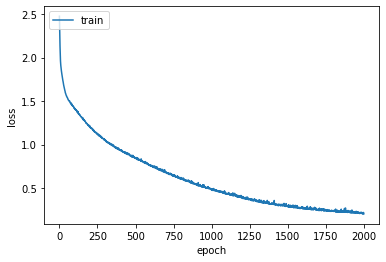

50/50 [==============================] - 0s 7ms/step
acc: 92.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'e8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


In [ ]:
# 전 체 코 드

# 0. 사용할 패키지 불러오기
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)
print(dataset)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
history.init()

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=10, verbose=2, callbacks=[history])
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4)) # batch_size, feature
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

<b>LSTM으로 구현해보기</b>

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

x_train = np.reshape(x_train, (50, 4, 1)) # 샘플 수, 타임스텝 수, 속성 수

NameError: name 'LSTM' is not defined

(50, 5)
one hot encoding vector size is  12
Epoch 1/2000
 - 2s - loss: 2.4837 - acc: 0.1400
Epoch 2/2000
 - 0s - loss: 2.4449 - acc: 0.2400
Epoch 3/2000
 - 0s - loss: 2.4059 - acc: 0.3400
Epoch 4/2000
 - 0s - loss: 2.3639 - acc: 0.3400
Epoch 5/2000
 - 0s - loss: 2.3102 - acc: 0.3400
Epoch 6/2000
 - 0s - loss: 2.2472 - acc: 0.3400
Epoch 7/2000
 - 0s - loss: 2.1757 - acc: 0.3400
Epoch 8/2000
 - 0s - loss: 2.0938 - acc: 0.3400
Epoch 9/2000
 - 0s - loss: 2.0181 - acc: 0.3400
Epoch 10/2000
 - 0s - loss: 1.9812 - acc: 0.3400
Epoch 11/2000
 - 0s - loss: 1.9746 - acc: 0.3400
Epoch 12/2000
 - 0s - loss: 1.9571 - acc: 0.3400
Epoch 13/2000
 - 0s - loss: 1.9408 - acc: 0.3400
Epoch 14/2000
 - 0s - loss: 1.9246 - acc: 0.3400
Epoch 15/2000
 - 0s - loss: 1.9247 - acc: 0.3400
Epoch 16/2000
 - 0s - loss: 1.9204 - acc: 0.3400
Epoch 17/2000
 - 0s - loss: 1.9199 - acc: 0.3400
Epoch 18/2000
 - 0s - loss: 1.9128 - acc: 0.3400
Epoch 19/2000
 - 0s - loss: 1.9062 - acc: 0.3400
Epoch 20/2000
 - 0s - loss: 1.9011

 - 0s - loss: 1.5870 - acc: 0.4400
Epoch 167/2000
 - 0s - loss: 1.5806 - acc: 0.4400
Epoch 168/2000
 - 0s - loss: 1.5815 - acc: 0.4400
Epoch 169/2000
 - 0s - loss: 1.5799 - acc: 0.4400
Epoch 170/2000
 - 0s - loss: 1.5661 - acc: 0.4400
Epoch 171/2000
 - 0s - loss: 1.5848 - acc: 0.3600
Epoch 172/2000
 - 0s - loss: 1.5765 - acc: 0.4000
Epoch 173/2000
 - 0s - loss: 1.5667 - acc: 0.4400
Epoch 174/2000
 - 0s - loss: 1.5677 - acc: 0.4400
Epoch 175/2000
 - 0s - loss: 1.5687 - acc: 0.4400
Epoch 176/2000
 - 0s - loss: 1.5661 - acc: 0.4400
Epoch 177/2000
 - 0s - loss: 1.5740 - acc: 0.3800
Epoch 178/2000
 - 0s - loss: 1.5671 - acc: 0.3600
Epoch 179/2000
 - 0s - loss: 1.5553 - acc: 0.4200
Epoch 180/2000
 - 0s - loss: 1.5501 - acc: 0.4400
Epoch 181/2000
 - 0s - loss: 1.5507 - acc: 0.4400
Epoch 182/2000
 - 0s - loss: 1.5499 - acc: 0.4800
Epoch 183/2000
 - 0s - loss: 1.5434 - acc: 0.4800
Epoch 184/2000
 - 0s - loss: 1.5452 - acc: 0.4000
Epoch 185/2000
 - 0s - loss: 1.5711 - acc: 0.4000
Epoch 186/2000


Epoch 331/2000
 - 0s - loss: 1.2761 - acc: 0.5800
Epoch 332/2000
 - 0s - loss: 1.2790 - acc: 0.5800
Epoch 333/2000
 - 0s - loss: 1.2668 - acc: 0.5800
Epoch 334/2000
 - 0s - loss: 1.2647 - acc: 0.5400
Epoch 335/2000
 - 0s - loss: 1.2705 - acc: 0.5800
Epoch 336/2000
 - 0s - loss: 1.2692 - acc: 0.5600
Epoch 337/2000
 - 0s - loss: 1.2549 - acc: 0.6000
Epoch 338/2000
 - 0s - loss: 1.2707 - acc: 0.5800
Epoch 339/2000
 - 0s - loss: 1.2532 - acc: 0.5800
Epoch 340/2000
 - 0s - loss: 1.2719 - acc: 0.5000
Epoch 341/2000
 - 0s - loss: 1.2460 - acc: 0.5600
Epoch 342/2000
 - 0s - loss: 1.2603 - acc: 0.6000
Epoch 343/2000
 - 0s - loss: 1.2529 - acc: 0.5400
Epoch 344/2000
 - 0s - loss: 1.2640 - acc: 0.5400
Epoch 345/2000
 - 0s - loss: 1.2423 - acc: 0.5400
Epoch 346/2000
 - 0s - loss: 1.2585 - acc: 0.5800
Epoch 347/2000
 - 0s - loss: 1.2430 - acc: 0.5600
Epoch 348/2000
 - 0s - loss: 1.2512 - acc: 0.5400
Epoch 349/2000
 - 0s - loss: 1.2539 - acc: 0.5400
Epoch 350/2000
 - 0s - loss: 1.2537 - acc: 0.5800


Epoch 495/2000
 - 0s - loss: 1.0174 - acc: 0.6000
Epoch 496/2000
 - 0s - loss: 1.0067 - acc: 0.5800
Epoch 497/2000
 - 0s - loss: 1.0025 - acc: 0.5600
Epoch 498/2000
 - 0s - loss: 0.9880 - acc: 0.6400
Epoch 499/2000
 - 0s - loss: 1.0043 - acc: 0.6400
Epoch 500/2000
 - 0s - loss: 0.9995 - acc: 0.6400
Epoch 501/2000
 - 0s - loss: 0.9924 - acc: 0.6600
Epoch 502/2000
 - 0s - loss: 1.0026 - acc: 0.6200
Epoch 503/2000
 - 0s - loss: 0.9889 - acc: 0.6400
Epoch 504/2000
 - 0s - loss: 1.0099 - acc: 0.6400
Epoch 505/2000
 - 0s - loss: 0.9819 - acc: 0.6400
Epoch 506/2000
 - 0s - loss: 0.9784 - acc: 0.6400
Epoch 507/2000
 - 0s - loss: 0.9740 - acc: 0.6200
Epoch 508/2000
 - 0s - loss: 0.9873 - acc: 0.6400
Epoch 509/2000
 - 0s - loss: 0.9904 - acc: 0.6200
Epoch 510/2000
 - 0s - loss: 0.9790 - acc: 0.6200
Epoch 511/2000
 - 0s - loss: 0.9760 - acc: 0.6000
Epoch 512/2000
 - 0s - loss: 0.9796 - acc: 0.6200
Epoch 513/2000
 - 0s - loss: 0.9669 - acc: 0.6200
Epoch 514/2000
 - 0s - loss: 0.9736 - acc: 0.6600


Epoch 659/2000
 - 0s - loss: 0.7565 - acc: 0.6800
Epoch 660/2000
 - 0s - loss: 0.7422 - acc: 0.7000
Epoch 661/2000
 - 0s - loss: 0.7287 - acc: 0.7600
Epoch 662/2000
 - 0s - loss: 0.7380 - acc: 0.7200
Epoch 663/2000
 - 0s - loss: 0.7237 - acc: 0.7400
Epoch 664/2000
 - 0s - loss: 0.7274 - acc: 0.7000
Epoch 665/2000
 - 0s - loss: 0.7200 - acc: 0.7600
Epoch 666/2000
 - 0s - loss: 0.7604 - acc: 0.6800
Epoch 667/2000
 - 0s - loss: 0.7280 - acc: 0.6800
Epoch 668/2000
 - 0s - loss: 0.7543 - acc: 0.7400
Epoch 669/2000
 - 0s - loss: 0.7284 - acc: 0.7400
Epoch 670/2000
 - 0s - loss: 0.7363 - acc: 0.7200
Epoch 671/2000
 - 0s - loss: 0.7209 - acc: 0.7400
Epoch 672/2000
 - 0s - loss: 0.7567 - acc: 0.7400
Epoch 673/2000
 - 0s - loss: 0.7286 - acc: 0.7200
Epoch 674/2000
 - 0s - loss: 0.7372 - acc: 0.7000
Epoch 675/2000
 - 0s - loss: 0.7491 - acc: 0.7000
Epoch 676/2000
 - 0s - loss: 0.7207 - acc: 0.7200
Epoch 677/2000
 - 0s - loss: 0.7152 - acc: 0.6800
Epoch 678/2000
 - 0s - loss: 0.7150 - acc: 0.7000


Epoch 823/2000
 - 0s - loss: 0.5855 - acc: 0.8000
Epoch 824/2000
 - 0s - loss: 0.5904 - acc: 0.7600
Epoch 825/2000
 - 0s - loss: 0.5957 - acc: 0.7800
Epoch 826/2000
 - 0s - loss: 0.5601 - acc: 0.7200
Epoch 827/2000
 - 0s - loss: 0.5751 - acc: 0.8000
Epoch 828/2000
 - 0s - loss: 0.5676 - acc: 0.8000
Epoch 829/2000
 - 0s - loss: 0.5495 - acc: 0.8000
Epoch 830/2000
 - 0s - loss: 0.5736 - acc: 0.8200
Epoch 831/2000
 - 0s - loss: 0.5978 - acc: 0.7600
Epoch 832/2000
 - 0s - loss: 0.5933 - acc: 0.7800
Epoch 833/2000
 - 0s - loss: 0.5652 - acc: 0.8000
Epoch 834/2000
 - 0s - loss: 0.5615 - acc: 0.8400
Epoch 835/2000
 - 0s - loss: 0.5396 - acc: 0.8400
Epoch 836/2000
 - 0s - loss: 0.5483 - acc: 0.8200
Epoch 837/2000
 - 0s - loss: 0.5502 - acc: 0.8200
Epoch 838/2000
 - 0s - loss: 0.5490 - acc: 0.8200
Epoch 839/2000
 - 0s - loss: 0.5421 - acc: 0.8200
Epoch 840/2000
 - 0s - loss: 0.5941 - acc: 0.7800
Epoch 841/2000
 - 0s - loss: 0.5319 - acc: 0.8000
Epoch 842/2000
 - 0s - loss: 0.5833 - acc: 0.7800


Epoch 987/2000
 - 0s - loss: 0.4556 - acc: 0.8800
Epoch 988/2000
 - 0s - loss: 0.4691 - acc: 0.8400
Epoch 989/2000
 - 0s - loss: 0.4627 - acc: 0.8200
Epoch 990/2000
 - 0s - loss: 0.4570 - acc: 0.8600
Epoch 991/2000
 - 0s - loss: 0.4609 - acc: 0.8600
Epoch 992/2000
 - 0s - loss: 0.4981 - acc: 0.8000
Epoch 993/2000
 - 0s - loss: 0.4585 - acc: 0.8600
Epoch 994/2000
 - 0s - loss: 0.4824 - acc: 0.8200
Epoch 995/2000
 - 0s - loss: 0.4589 - acc: 0.8400
Epoch 996/2000
 - 0s - loss: 0.4882 - acc: 0.8000
Epoch 997/2000
 - 0s - loss: 0.4791 - acc: 0.8400
Epoch 998/2000
 - 0s - loss: 0.4623 - acc: 0.8400
Epoch 999/2000
 - 0s - loss: 0.4914 - acc: 0.8400
Epoch 1000/2000
 - 0s - loss: 0.4481 - acc: 0.8400
Epoch 1001/2000
 - 0s - loss: 0.5001 - acc: 0.8000
Epoch 1002/2000
 - 0s - loss: 0.4392 - acc: 0.8800
Epoch 1003/2000
 - 0s - loss: 0.4920 - acc: 0.8200
Epoch 1004/2000
 - 0s - loss: 0.4627 - acc: 0.8400
Epoch 1005/2000
 - 0s - loss: 0.4488 - acc: 0.8200
Epoch 1006/2000
 - 0s - loss: 0.4595 - acc: 

Epoch 1148/2000
 - 0s - loss: 0.4380 - acc: 0.8200
Epoch 1149/2000
 - 0s - loss: 0.5099 - acc: 0.8400
Epoch 1150/2000
 - 0s - loss: 0.4222 - acc: 0.8600
Epoch 1151/2000
 - 0s - loss: 0.4499 - acc: 0.8400
Epoch 1152/2000
 - 0s - loss: 0.4540 - acc: 0.8400
Epoch 1153/2000
 - 0s - loss: 0.4223 - acc: 0.8400
Epoch 1154/2000
 - 0s - loss: 0.4616 - acc: 0.8000
Epoch 1155/2000
 - 0s - loss: 0.3979 - acc: 0.8800
Epoch 1156/2000
 - 0s - loss: 0.4643 - acc: 0.8200
Epoch 1157/2000
 - 0s - loss: 0.4730 - acc: 0.8400
Epoch 1158/2000
 - 0s - loss: 0.4341 - acc: 0.8400
Epoch 1159/2000
 - 0s - loss: 0.4362 - acc: 0.8200
Epoch 1160/2000
 - 0s - loss: 0.4010 - acc: 0.8600
Epoch 1161/2000
 - 0s - loss: 0.4134 - acc: 0.8200
Epoch 1162/2000
 - 0s - loss: 0.4040 - acc: 0.8400
Epoch 1163/2000
 - 0s - loss: 0.4040 - acc: 0.8600
Epoch 1164/2000
 - 0s - loss: 0.4077 - acc: 0.8400
Epoch 1165/2000
 - 0s - loss: 0.4190 - acc: 0.8400
Epoch 1166/2000
 - 0s - loss: 0.4128 - acc: 0.8400
Epoch 1167/2000
 - 0s - loss: 0

Epoch 1309/2000
 - 0s - loss: 0.3660 - acc: 0.8600
Epoch 1310/2000
 - 0s - loss: 0.3603 - acc: 0.8600
Epoch 1311/2000
 - 0s - loss: 0.3710 - acc: 0.8400
Epoch 1312/2000
 - 0s - loss: 0.3602 - acc: 0.8600
Epoch 1313/2000
 - 0s - loss: 0.3759 - acc: 0.8400
Epoch 1314/2000
 - 0s - loss: 0.3660 - acc: 0.8600
Epoch 1315/2000
 - 0s - loss: 0.3778 - acc: 0.8400
Epoch 1316/2000
 - 0s - loss: 0.3542 - acc: 0.8600
Epoch 1317/2000
 - 0s - loss: 0.3578 - acc: 0.8600
Epoch 1318/2000
 - 0s - loss: 0.3670 - acc: 0.8400
Epoch 1319/2000
 - 0s - loss: 0.3776 - acc: 0.8400
Epoch 1320/2000
 - 0s - loss: 0.3521 - acc: 0.8600
Epoch 1321/2000
 - 0s - loss: 0.3868 - acc: 0.8400
Epoch 1322/2000
 - 0s - loss: 0.3620 - acc: 0.8800
Epoch 1323/2000
 - 0s - loss: 0.3808 - acc: 0.8600
Epoch 1324/2000
 - 0s - loss: 0.3758 - acc: 0.8600
Epoch 1325/2000
 - 0s - loss: 0.3530 - acc: 0.8800
Epoch 1326/2000
 - 0s - loss: 0.3732 - acc: 0.8800
Epoch 1327/2000
 - 0s - loss: 0.3644 - acc: 0.8600
Epoch 1328/2000
 - 0s - loss: 0

Epoch 1470/2000
 - 0s - loss: 0.3504 - acc: 0.8600
Epoch 1471/2000
 - 0s - loss: 0.3825 - acc: 0.8600
Epoch 1472/2000
 - 0s - loss: 0.3934 - acc: 0.8400
Epoch 1473/2000
 - 0s - loss: 0.3638 - acc: 0.8600
Epoch 1474/2000
 - 0s - loss: 0.3616 - acc: 0.8400
Epoch 1475/2000
 - 0s - loss: 0.3405 - acc: 0.9000
Epoch 1476/2000
 - 0s - loss: 0.3444 - acc: 0.8600
Epoch 1477/2000
 - 0s - loss: 0.3440 - acc: 0.8400
Epoch 1478/2000
 - 0s - loss: 0.3464 - acc: 0.8800
Epoch 1479/2000
 - 0s - loss: 0.3400 - acc: 0.8400
Epoch 1480/2000
 - 0s - loss: 0.3442 - acc: 0.8800
Epoch 1481/2000
 - 0s - loss: 0.3341 - acc: 0.8800
Epoch 1482/2000
 - 0s - loss: 0.3292 - acc: 0.8800
Epoch 1483/2000
 - 0s - loss: 0.3303 - acc: 0.8600
Epoch 1484/2000
 - 0s - loss: 0.3364 - acc: 0.8400
Epoch 1485/2000
 - 0s - loss: 0.3334 - acc: 0.8400
Epoch 1486/2000
 - 0s - loss: 0.3361 - acc: 0.8600
Epoch 1487/2000
 - 0s - loss: 0.3370 - acc: 0.8600
Epoch 1488/2000
 - 0s - loss: 0.3358 - acc: 0.8600
Epoch 1489/2000
 - 0s - loss: 0

Epoch 1631/2000
 - 0s - loss: 0.3194 - acc: 0.8800
Epoch 1632/2000
 - 0s - loss: 0.3263 - acc: 0.8600
Epoch 1633/2000
 - 0s - loss: 0.3143 - acc: 0.8600
Epoch 1634/2000
 - 0s - loss: 0.3428 - acc: 0.8600
Epoch 1635/2000
 - 0s - loss: 0.2950 - acc: 0.9000
Epoch 1636/2000
 - 0s - loss: 0.3432 - acc: 0.8800
Epoch 1637/2000
 - 0s - loss: 0.3080 - acc: 0.8800
Epoch 1638/2000
 - 0s - loss: 0.3376 - acc: 0.8600
Epoch 1639/2000
 - 0s - loss: 0.3024 - acc: 0.8800
Epoch 1640/2000
 - 0s - loss: 0.3347 - acc: 0.8600
Epoch 1641/2000
 - 0s - loss: 0.3431 - acc: 0.8600
Epoch 1642/2000
 - 0s - loss: 0.3176 - acc: 0.8600
Epoch 1643/2000
 - 0s - loss: 0.3368 - acc: 0.9000
Epoch 1644/2000
 - 0s - loss: 0.3351 - acc: 0.8600
Epoch 1645/2000
 - 0s - loss: 0.3467 - acc: 0.8800
Epoch 1646/2000
 - 0s - loss: 0.3284 - acc: 0.8600
Epoch 1647/2000
 - 0s - loss: 0.3326 - acc: 0.8600
Epoch 1648/2000
 - 0s - loss: 0.3402 - acc: 0.8200
Epoch 1649/2000
 - 0s - loss: 0.3227 - acc: 0.8600
Epoch 1650/2000
 - 0s - loss: 0

Epoch 1792/2000
 - 0s - loss: 0.3222 - acc: 0.8600
Epoch 1793/2000
 - 0s - loss: 0.3085 - acc: 0.8600
Epoch 1794/2000
 - 0s - loss: 0.3072 - acc: 0.8600
Epoch 1795/2000
 - 0s - loss: 0.3087 - acc: 0.8600
Epoch 1796/2000
 - 0s - loss: 0.3053 - acc: 0.8600
Epoch 1797/2000
 - 0s - loss: 0.2963 - acc: 0.8800
Epoch 1798/2000
 - 0s - loss: 0.2929 - acc: 0.8800
Epoch 1799/2000
 - 0s - loss: 0.2988 - acc: 0.8400
Epoch 1800/2000
 - 0s - loss: 0.2949 - acc: 0.8800
Epoch 1801/2000
 - 0s - loss: 0.2991 - acc: 0.8800
Epoch 1802/2000
 - 0s - loss: 0.3022 - acc: 0.8800
Epoch 1803/2000
 - 0s - loss: 0.3050 - acc: 0.8800
Epoch 1804/2000
 - 0s - loss: 0.2970 - acc: 0.9000
Epoch 1805/2000
 - 0s - loss: 0.2980 - acc: 0.8800
Epoch 1806/2000
 - 0s - loss: 0.2995 - acc: 0.8400
Epoch 1807/2000
 - 0s - loss: 0.2963 - acc: 0.8600
Epoch 1808/2000
 - 0s - loss: 0.2945 - acc: 0.8400
Epoch 1809/2000
 - 0s - loss: 0.3037 - acc: 0.8600
Epoch 1810/2000
 - 0s - loss: 0.3012 - acc: 0.8600
Epoch 1811/2000
 - 0s - loss: 0

Epoch 1953/2000
 - 0s - loss: 0.2861 - acc: 0.8800
Epoch 1954/2000
 - 0s - loss: 0.3016 - acc: 0.8600
Epoch 1955/2000
 - 0s - loss: 0.2928 - acc: 0.8600
Epoch 1956/2000
 - 0s - loss: 0.2884 - acc: 0.9000
Epoch 1957/2000
 - 0s - loss: 0.2910 - acc: 0.9000
Epoch 1958/2000
 - 0s - loss: 0.2899 - acc: 0.9000
Epoch 1959/2000
 - 0s - loss: 0.2852 - acc: 0.9000
Epoch 1960/2000
 - 0s - loss: 0.2822 - acc: 0.8800
Epoch 1961/2000
 - 0s - loss: 0.2889 - acc: 0.8400
Epoch 1962/2000
 - 0s - loss: 0.2819 - acc: 0.8800
Epoch 1963/2000
 - 0s - loss: 0.2899 - acc: 0.8600
Epoch 1964/2000
 - 0s - loss: 0.3055 - acc: 0.8800
Epoch 1965/2000
 - 0s - loss: 0.2761 - acc: 0.9000
Epoch 1966/2000
 - 0s - loss: 0.3060 - acc: 0.8800
Epoch 1967/2000
 - 0s - loss: 0.3240 - acc: 0.8400
Epoch 1968/2000
 - 0s - loss: 0.3047 - acc: 0.8400
Epoch 1969/2000
 - 0s - loss: 0.2956 - acc: 0.9000
Epoch 1970/2000
 - 0s - loss: 0.3060 - acc: 0.9000
Epoch 1971/2000
 - 0s - loss: 0.2964 - acc: 0.8600
Epoch 1972/2000
 - 0s - loss: 0

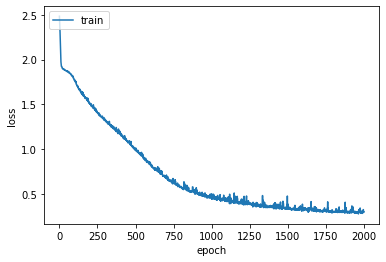

50/50 [==============================] - 1s 10ms/step
acc: 90.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'f4', 'e8', 'e8', 'e8', 'e8', 'f8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8', 'd8']


In [ ]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def __init__(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

# 1. 데이터 준비하기
        
# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))

# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = LossHistory() # 손실 이력 객체 생성
#history.init() __init__으로 만들어 놓으면 굳이 .init()을 만들어 실행해줄 필요가 없음

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2, callbacks=[history])

# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

<b> stateful LSTM 모델을 이용해보자 </b>

LSTM모델에서 상태유지 모드를 추가한 상황

model = Sequential()

model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))

model.add(Dense(one_hot_vec_size, activation='softmax'))

num_epochs = 2000

for epoch_idx in range(num_epochs):

    print ('epochs : ' + str(epoch_idx) )
    
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False) # 50 is X.shape[0]
    
    model.reset_states()

(50, 5)
one hot encoding vector size is  12
epochs : 0
Epoch 1/1
 - 3s - loss: 2.3456 - acc: 0.1400
epochs : 1
Epoch 1/1
 - 1s - loss: 2.0396 - acc: 0.3400
epochs : 2
Epoch 1/1
 - 0s - loss: 1.9628 - acc: 0.3400
epochs : 3
Epoch 1/1
 - 0s - loss: 1.9466 - acc: 0.3400
epochs : 4
Epoch 1/1
 - 0s - loss: 1.9367 - acc: 0.3400
epochs : 5
Epoch 1/1
 - 1s - loss: 1.9301 - acc: 0.3600
epochs : 6
Epoch 1/1
 - 0s - loss: 1.9249 - acc: 0.3600
epochs : 7
Epoch 1/1
 - 1s - loss: 1.9208 - acc: 0.3600
epochs : 8
Epoch 1/1
 - 1s - loss: 1.9172 - acc: 0.3600
epochs : 9
Epoch 1/1
 - 0s - loss: 1.9140 - acc: 0.3600
epochs : 10
Epoch 1/1
 - 0s - loss: 1.9110 - acc: 0.3600
epochs : 11
Epoch 1/1
 - 1s - loss: 1.9081 - acc: 0.3600
epochs : 12
Epoch 1/1
 - 0s - loss: 1.9051 - acc: 0.3600
epochs : 13
Epoch 1/1
 - 0s - loss: 1.9017 - acc: 0.3600
epochs : 14
Epoch 1/1
 - 1s - loss: 1.8979 - acc: 0.3600
epochs : 15
Epoch 1/1
 - 0s - loss: 1.8980 - acc: 0.3600
epochs : 16
Epoch 1/1
 - 1s - loss: 1.8863 - acc: 0.36

 - 0s - loss: 0.9955 - acc: 0.6400
epochs : 143
Epoch 1/1
 - 0s - loss: 0.6513 - acc: 0.7800
epochs : 144
Epoch 1/1
 - 0s - loss: 0.5256 - acc: 0.8400
epochs : 145
Epoch 1/1
 - 0s - loss: 0.8781 - acc: 0.7200
epochs : 146
Epoch 1/1
 - 0s - loss: 1.2928 - acc: 0.4800
epochs : 147
Epoch 1/1
 - 0s - loss: 0.6991 - acc: 0.7200
epochs : 148
Epoch 1/1
 - 0s - loss: 1.2287 - acc: 0.5000
epochs : 149
Epoch 1/1
 - 0s - loss: 1.0369 - acc: 0.6400
epochs : 150
Epoch 1/1
 - 0s - loss: 0.7358 - acc: 0.7800
epochs : 151
Epoch 1/1
 - 0s - loss: 0.5968 - acc: 0.8000
epochs : 152
Epoch 1/1
 - 0s - loss: 0.3845 - acc: 0.9000
epochs : 153
Epoch 1/1
 - 1s - loss: 0.3449 - acc: 0.9000
epochs : 154
Epoch 1/1
 - 0s - loss: 0.3446 - acc: 0.9000
epochs : 155
Epoch 1/1
 - 0s - loss: 0.6819 - acc: 0.7000
epochs : 156
Epoch 1/1
 - 0s - loss: 0.6912 - acc: 0.7000
epochs : 157
Epoch 1/1
 - 0s - loss: 0.4492 - acc: 0.8600
epochs : 158
Epoch 1/1
 - 0s - loss: 0.2701 - acc: 0.9800
epochs : 159
Epoch 1/1
 - 0s - loss: 

epochs : 284
Epoch 1/1
 - 0s - loss: 0.0017 - acc: 1.0000
epochs : 285
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs : 286
Epoch 1/1
 - 0s - loss: 0.0016 - acc: 1.0000
epochs : 287
Epoch 1/1
 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 288
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 289
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 290
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 291
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 292
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 293
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 294
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 295
Epoch 1/1
 - 1s - loss: 0.0011 - acc: 1.0000
epochs : 296
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 297
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 298
Epoch 1/1
 - 0s - loss: 0.0010 - acc: 1.0000
epochs : 299
Epoch 1/1
 - 0s - loss: 0.0010 - acc: 1.0000
epochs : 300
Epoch 1/1
 - 0s - loss: 9.8178e-04 - acc: 1.0000
epochs : 3

 - 1s - loss: 0.0128 - acc: 1.0000
epochs : 422
Epoch 1/1
 - 1s - loss: 0.0123 - acc: 1.0000
epochs : 423
Epoch 1/1
 - 1s - loss: 0.0109 - acc: 1.0000
epochs : 424
Epoch 1/1
 - 0s - loss: 0.0102 - acc: 1.0000
epochs : 425
Epoch 1/1
 - 1s - loss: 0.0092 - acc: 1.0000
epochs : 426
Epoch 1/1
 - 1s - loss: 0.0087 - acc: 1.0000
epochs : 427
Epoch 1/1
 - 0s - loss: 0.0080 - acc: 1.0000
epochs : 428
Epoch 1/1
 - 1s - loss: 0.0076 - acc: 1.0000
epochs : 429
Epoch 1/1
 - 1s - loss: 0.0071 - acc: 1.0000
epochs : 430
Epoch 1/1
 - 0s - loss: 0.0068 - acc: 1.0000
epochs : 431
Epoch 1/1
 - 1s - loss: 0.0065 - acc: 1.0000
epochs : 432
Epoch 1/1
 - 1s - loss: 0.0062 - acc: 1.0000
epochs : 433
Epoch 1/1
 - 1s - loss: 0.0060 - acc: 1.0000
epochs : 434
Epoch 1/1
 - 0s - loss: 0.0059 - acc: 1.0000
epochs : 435
Epoch 1/1
 - 0s - loss: 0.0057 - acc: 1.0000
epochs : 436
Epoch 1/1
 - 0s - loss: 0.0056 - acc: 1.0000
epochs : 437
Epoch 1/1
 - 1s - loss: 0.0058 - acc: 1.0000
epochs : 438
Epoch 1/1
 - 1s - loss: 

epochs : 563
Epoch 1/1
 - 0s - loss: 0.0899 - acc: 0.9800
epochs : 564
Epoch 1/1
 - 0s - loss: 0.0400 - acc: 1.0000
epochs : 565
Epoch 1/1
 - 0s - loss: 0.0323 - acc: 1.0000
epochs : 566
Epoch 1/1
 - 0s - loss: 0.0281 - acc: 1.0000
epochs : 567
Epoch 1/1
 - 0s - loss: 0.0242 - acc: 1.0000
epochs : 568
Epoch 1/1
 - 0s - loss: 0.0208 - acc: 1.0000
epochs : 569
Epoch 1/1
 - 0s - loss: 0.0181 - acc: 1.0000
epochs : 570
Epoch 1/1
 - 0s - loss: 0.0160 - acc: 1.0000
epochs : 571
Epoch 1/1
 - 0s - loss: 0.0143 - acc: 1.0000
epochs : 572
Epoch 1/1
 - 0s - loss: 0.0130 - acc: 1.0000
epochs : 573
Epoch 1/1
 - 0s - loss: 0.0118 - acc: 1.0000
epochs : 574
Epoch 1/1
 - 0s - loss: 0.0108 - acc: 1.0000
epochs : 575
Epoch 1/1
 - 0s - loss: 0.0100 - acc: 1.0000
epochs : 576
Epoch 1/1
 - 1s - loss: 0.0092 - acc: 1.0000
epochs : 577
Epoch 1/1
 - 1s - loss: 0.0086 - acc: 1.0000
epochs : 578
Epoch 1/1
 - 0s - loss: 0.0080 - acc: 1.0000
epochs : 579
Epoch 1/1
 - 1s - loss: 0.0076 - acc: 1.0000
epochs : 580
E

 - 0s - loss: 1.3183e-04 - acc: 1.0000
epochs : 701
Epoch 1/1
 - 0s - loss: 1.2949e-04 - acc: 1.0000
epochs : 702
Epoch 1/1
 - 0s - loss: 1.2668e-04 - acc: 1.0000
epochs : 703
Epoch 1/1
 - 0s - loss: 1.2400e-04 - acc: 1.0000
epochs : 704
Epoch 1/1
 - 0s - loss: 1.2170e-04 - acc: 1.0000
epochs : 705
Epoch 1/1
 - 0s - loss: 1.1987e-04 - acc: 1.0000
epochs : 706
Epoch 1/1
 - 0s - loss: 1.1802e-04 - acc: 1.0000
epochs : 707
Epoch 1/1
 - 0s - loss: 1.1668e-04 - acc: 1.0000
epochs : 708
Epoch 1/1
 - 0s - loss: 1.1461e-04 - acc: 1.0000
epochs : 709
Epoch 1/1
 - 0s - loss: 1.1122e-04 - acc: 1.0000
epochs : 710
Epoch 1/1
 - 0s - loss: 1.1059e-04 - acc: 1.0000
epochs : 711
Epoch 1/1
 - 0s - loss: 1.0833e-04 - acc: 1.0000
epochs : 712
Epoch 1/1
 - 0s - loss: 1.0217e-04 - acc: 1.0000
epochs : 713
Epoch 1/1
 - 0s - loss: 1.0393e-04 - acc: 1.0000
epochs : 714
Epoch 1/1
 - 0s - loss: 9.8021e-05 - acc: 1.0000
epochs : 715
Epoch 1/1
 - 0s - loss: 9.4543e-05 - acc: 1.0000
epochs : 716
Epoch 1/1
 - 0s - 

epochs : 840
Epoch 1/1
 - 0s - loss: 8.9260e-04 - acc: 1.0000
epochs : 841
Epoch 1/1
 - 0s - loss: 8.6426e-04 - acc: 1.0000
epochs : 842
Epoch 1/1
 - 0s - loss: 8.3580e-04 - acc: 1.0000
epochs : 843
Epoch 1/1
 - 0s - loss: 8.0967e-04 - acc: 1.0000
epochs : 844
Epoch 1/1
 - 0s - loss: 7.8651e-04 - acc: 1.0000
epochs : 845
Epoch 1/1
 - 0s - loss: 7.6019e-04 - acc: 1.0000
epochs : 846
Epoch 1/1
 - 0s - loss: 7.3114e-04 - acc: 1.0000
epochs : 847
Epoch 1/1
 - 0s - loss: 6.9936e-04 - acc: 1.0000
epochs : 848
Epoch 1/1
 - 0s - loss: 6.7150e-04 - acc: 1.0000
epochs : 849
Epoch 1/1
 - 0s - loss: 6.4672e-04 - acc: 1.0000
epochs : 850
Epoch 1/1
 - 0s - loss: 6.2795e-04 - acc: 1.0000
epochs : 851
Epoch 1/1
 - 0s - loss: 6.0572e-04 - acc: 1.0000
epochs : 852
Epoch 1/1
 - 0s - loss: 5.8854e-04 - acc: 1.0000
epochs : 853
Epoch 1/1
 - 0s - loss: 5.7645e-04 - acc: 1.0000
epochs : 854
Epoch 1/1
 - 0s - loss: 5.6721e-04 - acc: 1.0000
epochs : 855
Epoch 1/1
 - 1s - loss: 5.6449e-04 - acc: 1.0000
epochs :

epochs : 980
Epoch 1/1
 - 0s - loss: 0.0119 - acc: 1.0000
epochs : 981
Epoch 1/1
 - 0s - loss: 0.0086 - acc: 1.0000
epochs : 982
Epoch 1/1
 - 0s - loss: 0.0161 - acc: 1.0000
epochs : 983
Epoch 1/1
 - 0s - loss: 0.0114 - acc: 1.0000
epochs : 984
Epoch 1/1
 - 0s - loss: 0.0103 - acc: 1.0000
epochs : 985
Epoch 1/1
 - 0s - loss: 0.0085 - acc: 1.0000
epochs : 986
Epoch 1/1
 - 0s - loss: 0.0073 - acc: 1.0000
epochs : 987
Epoch 1/1
 - 0s - loss: 0.0069 - acc: 1.0000
epochs : 988
Epoch 1/1
 - 0s - loss: 0.0057 - acc: 1.0000
epochs : 989
Epoch 1/1
 - 0s - loss: 0.0054 - acc: 1.0000
epochs : 990
Epoch 1/1
 - 0s - loss: 0.0051 - acc: 1.0000
epochs : 991
Epoch 1/1
 - 0s - loss: 0.0046 - acc: 1.0000
epochs : 992
Epoch 1/1
 - 0s - loss: 0.0042 - acc: 1.0000
epochs : 993
Epoch 1/1
 - 0s - loss: 0.0040 - acc: 1.0000
epochs : 994
Epoch 1/1
 - 0s - loss: 0.0041 - acc: 1.0000
epochs : 995
Epoch 1/1
 - 0s - loss: 0.0040 - acc: 1.0000
epochs : 996
Epoch 1/1
 - 0s - loss: 0.0037 - acc: 1.0000
epochs : 997
E

epochs : 1114
Epoch 1/1
 - 0s - loss: 1.1707e-04 - acc: 1.0000
epochs : 1115
Epoch 1/1
 - 0s - loss: 1.1556e-04 - acc: 1.0000
epochs : 1116
Epoch 1/1
 - 0s - loss: 1.1396e-04 - acc: 1.0000
epochs : 1117
Epoch 1/1
 - 0s - loss: 1.1217e-04 - acc: 1.0000
epochs : 1118
Epoch 1/1
 - 0s - loss: 1.0947e-04 - acc: 1.0000
epochs : 1119
Epoch 1/1
 - 0s - loss: 1.0665e-04 - acc: 1.0000
epochs : 1120
Epoch 1/1
 - 0s - loss: 1.0377e-04 - acc: 1.0000
epochs : 1121
Epoch 1/1
 - 0s - loss: 1.0059e-04 - acc: 1.0000
epochs : 1122
Epoch 1/1
 - 0s - loss: 9.5948e-05 - acc: 1.0000
epochs : 1123
Epoch 1/1
 - 0s - loss: 9.4333e-05 - acc: 1.0000
epochs : 1124
Epoch 1/1
 - 0s - loss: 9.9551e-05 - acc: 1.0000
epochs : 1125
Epoch 1/1
 - 0s - loss: 9.2652e-05 - acc: 1.0000
epochs : 1126
Epoch 1/1
 - 0s - loss: 8.8706e-05 - acc: 1.0000
epochs : 1127
Epoch 1/1
 - 0s - loss: 8.4309e-05 - acc: 1.0000
epochs : 1128
Epoch 1/1
 - 0s - loss: 8.3407e-05 - acc: 1.0000
epochs : 1129
Epoch 1/1
 - 1s - loss: 8.1514e-05 - acc:

epochs : 1248
Epoch 1/1
 - 0s - loss: 0.0773 - acc: 0.9800
epochs : 1249
Epoch 1/1
 - 0s - loss: 0.1497 - acc: 0.9600
epochs : 1250
Epoch 1/1
 - 0s - loss: 1.5524 - acc: 0.6200
epochs : 1251
Epoch 1/1
 - 0s - loss: 1.5161 - acc: 0.5400
epochs : 1252
Epoch 1/1
 - 0s - loss: 0.9949 - acc: 0.7400
epochs : 1253
Epoch 1/1
 - 0s - loss: 0.5676 - acc: 0.8600
epochs : 1254
Epoch 1/1
 - 0s - loss: 0.5000 - acc: 0.8000
epochs : 1255
Epoch 1/1
 - 0s - loss: 0.3757 - acc: 0.8600
epochs : 1256
Epoch 1/1
 - 1s - loss: 0.2752 - acc: 0.9400
epochs : 1257
Epoch 1/1
 - 0s - loss: 0.2536 - acc: 0.9400
epochs : 1258
Epoch 1/1
 - 0s - loss: 0.2906 - acc: 0.8600
epochs : 1259
Epoch 1/1
 - 0s - loss: 0.1566 - acc: 0.9400
epochs : 1260
Epoch 1/1
 - 0s - loss: 0.1021 - acc: 0.9800
epochs : 1261
Epoch 1/1
 - 0s - loss: 0.0952 - acc: 0.9800
epochs : 1262
Epoch 1/1
 - 0s - loss: 0.0419 - acc: 1.0000
epochs : 1263
Epoch 1/1
 - 0s - loss: 0.0295 - acc: 1.0000
epochs : 1264
Epoch 1/1
 - 0s - loss: 0.0254 - acc: 1.00

 - 0s - loss: 2.2634e-04 - acc: 1.0000
epochs : 1384
Epoch 1/1
 - 0s - loss: 2.2001e-04 - acc: 1.0000
epochs : 1385
Epoch 1/1
 - 0s - loss: 2.1297e-04 - acc: 1.0000
epochs : 1386
Epoch 1/1
 - 0s - loss: 2.0503e-04 - acc: 1.0000
epochs : 1387
Epoch 1/1
 - 0s - loss: 1.9862e-04 - acc: 1.0000
epochs : 1388
Epoch 1/1
 - 0s - loss: 1.9199e-04 - acc: 1.0000
epochs : 1389
Epoch 1/1
 - 0s - loss: 1.8559e-04 - acc: 1.0000
epochs : 1390
Epoch 1/1
 - 0s - loss: 1.7972e-04 - acc: 1.0000
epochs : 1391
Epoch 1/1
 - 0s - loss: 1.7401e-04 - acc: 1.0000
epochs : 1392
Epoch 1/1
 - 0s - loss: 1.6864e-04 - acc: 1.0000
epochs : 1393
Epoch 1/1
 - 0s - loss: 1.6353e-04 - acc: 1.0000
epochs : 1394
Epoch 1/1
 - 0s - loss: 1.5826e-04 - acc: 1.0000
epochs : 1395
Epoch 1/1
 - 0s - loss: 1.5318e-04 - acc: 1.0000
epochs : 1396
Epoch 1/1
 - 0s - loss: 1.4884e-04 - acc: 1.0000
epochs : 1397
Epoch 1/1
 - 0s - loss: 1.4436e-04 - acc: 1.0000
epochs : 1398
Epoch 1/1
 - 0s - loss: 1.4009e-04 - acc: 1.0000
epochs : 1399
Ep

 - 0s - loss: 0.0015 - acc: 1.0000
epochs : 1519
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 1520
Epoch 1/1
 - 0s - loss: 0.0014 - acc: 1.0000
epochs : 1521
Epoch 1/1
 - 0s - loss: 0.0013 - acc: 1.0000
epochs : 1522
Epoch 1/1
 - 1s - loss: 0.0013 - acc: 1.0000
epochs : 1523
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 1524
Epoch 1/1
 - 0s - loss: 0.0012 - acc: 1.0000
epochs : 1525
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 1526
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 1527
Epoch 1/1
 - 0s - loss: 0.0011 - acc: 1.0000
epochs : 1528
Epoch 1/1
 - 0s - loss: 0.0010 - acc: 1.0000
epochs : 1529
Epoch 1/1
 - 0s - loss: 0.0010 - acc: 1.0000
epochs : 1530
Epoch 1/1
 - 0s - loss: 9.7963e-04 - acc: 1.0000
epochs : 1531
Epoch 1/1
 - 0s - loss: 9.4188e-04 - acc: 1.0000
epochs : 1532
Epoch 1/1
 - 0s - loss: 9.2987e-04 - acc: 1.0000
epochs : 1533
Epoch 1/1
 - 0s - loss: 8.7937e-04 - acc: 1.0000
epochs : 1534
Epoch 1/1
 - 0s - loss: 8.4609e-04 - acc: 1.0000
e

 - 0s - loss: 7.2287e-04 - acc: 1.0000
epochs : 1656
Epoch 1/1
 - 1s - loss: 7.0510e-04 - acc: 1.0000
epochs : 1657
Epoch 1/1
 - 0s - loss: 6.8828e-04 - acc: 1.0000
epochs : 1658
Epoch 1/1
 - 0s - loss: 6.7109e-04 - acc: 1.0000
epochs : 1659
Epoch 1/1
 - 0s - loss: 6.5461e-04 - acc: 1.0000
epochs : 1660
Epoch 1/1
 - 0s - loss: 6.3843e-04 - acc: 1.0000
epochs : 1661
Epoch 1/1
 - 0s - loss: 6.2291e-04 - acc: 1.0000
epochs : 1662
Epoch 1/1
 - 0s - loss: 6.0687e-04 - acc: 1.0000
epochs : 1663
Epoch 1/1
 - 0s - loss: 5.8962e-04 - acc: 1.0000
epochs : 1664
Epoch 1/1
 - 0s - loss: 5.7173e-04 - acc: 1.0000
epochs : 1665
Epoch 1/1
 - 0s - loss: 5.5423e-04 - acc: 1.0000
epochs : 1666
Epoch 1/1
 - 0s - loss: 5.3786e-04 - acc: 1.0000
epochs : 1667
Epoch 1/1
 - 0s - loss: 5.2152e-04 - acc: 1.0000
epochs : 1668
Epoch 1/1
 - 0s - loss: 5.0652e-04 - acc: 1.0000
epochs : 1669
Epoch 1/1
 - 0s - loss: 4.9260e-04 - acc: 1.0000
epochs : 1670
Epoch 1/1
 - 0s - loss: 4.8007e-04 - acc: 1.0000
epochs : 1671
Ep

epochs : 1786
Epoch 1/1
 - 1s - loss: 2.2861e-05 - acc: 1.0000
epochs : 1787
Epoch 1/1
 - 3s - loss: 2.1767e-05 - acc: 1.0000
epochs : 1788
Epoch 1/1
 - 1s - loss: 2.0868e-05 - acc: 1.0000
epochs : 1789
Epoch 1/1
 - 1s - loss: 2.0061e-05 - acc: 1.0000
epochs : 1790
Epoch 1/1
 - 0s - loss: 1.9265e-05 - acc: 1.0000
epochs : 1791
Epoch 1/1
 - 0s - loss: 1.8990e-05 - acc: 1.0000
epochs : 1792
Epoch 1/1
 - 0s - loss: 1.9179e-05 - acc: 1.0000
epochs : 1793
Epoch 1/1
 - 0s - loss: 1.8868e-05 - acc: 1.0000
epochs : 1794
Epoch 1/1
 - 0s - loss: 1.8894e-05 - acc: 1.0000
epochs : 1795
Epoch 1/1
 - 0s - loss: 1.9304e-05 - acc: 1.0000
epochs : 1796
Epoch 1/1
 - 0s - loss: 1.9643e-05 - acc: 1.0000
epochs : 1797
Epoch 1/1
 - 0s - loss: 1.8196e-05 - acc: 1.0000
epochs : 1798
Epoch 1/1
 - 0s - loss: 1.8349e-05 - acc: 1.0000
epochs : 1799
Epoch 1/1
 - 0s - loss: 1.7717e-05 - acc: 1.0000
epochs : 1800
Epoch 1/1
 - 0s - loss: 1.6625e-05 - acc: 1.0000
epochs : 1801
Epoch 1/1
 - 0s - loss: 1.5414e-05 - acc:

epochs : 1921
Epoch 1/1
 - 0s - loss: 5.8344e-04 - acc: 1.0000
epochs : 1922
Epoch 1/1
 - 0s - loss: 5.5771e-04 - acc: 1.0000
epochs : 1923
Epoch 1/1
 - 0s - loss: 5.3734e-04 - acc: 1.0000
epochs : 1924
Epoch 1/1
 - 0s - loss: 5.1667e-04 - acc: 1.0000
epochs : 1925
Epoch 1/1
 - 0s - loss: 4.9542e-04 - acc: 1.0000
epochs : 1926
Epoch 1/1
 - 0s - loss: 4.7633e-04 - acc: 1.0000
epochs : 1927
Epoch 1/1
 - 0s - loss: 4.6209e-04 - acc: 1.0000
epochs : 1928
Epoch 1/1
 - 0s - loss: 4.5393e-04 - acc: 1.0000
epochs : 1929
Epoch 1/1
 - 0s - loss: 4.4657e-04 - acc: 1.0000
epochs : 1930
Epoch 1/1
 - 0s - loss: 4.3987e-04 - acc: 1.0000
epochs : 1931
Epoch 1/1
 - 0s - loss: 4.1882e-04 - acc: 1.0000
epochs : 1932
Epoch 1/1
 - 0s - loss: 3.9641e-04 - acc: 1.0000
epochs : 1933
Epoch 1/1
 - 0s - loss: 3.7571e-04 - acc: 1.0000
epochs : 1934
Epoch 1/1
 - 0s - loss: 3.5930e-04 - acc: 1.0000
epochs : 1935
Epoch 1/1
 - 0s - loss: 3.4714e-04 - acc: 1.0000
epochs : 1936
Epoch 1/1
 - 1s - loss: 3.4406e-04 - acc:

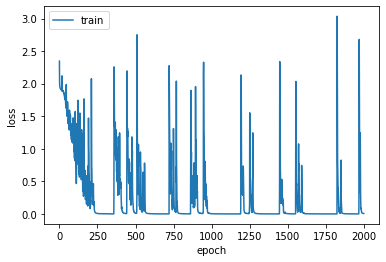

50/50 [==============================] - 1s 25ms/step
acc: 100.00%
one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']
full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


In [ ]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# 랜덤시드 고정시키기
np.random.seed(5)

# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

# 데이터셋 생성 함수
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)        

# 1. 데이터 준비하기

# 코드 사전 정의

code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

# 시퀀스 데이터 정의

seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

# 2. 데이터셋 생성하기

dataset = seq2dataset(seq, window_size = 4)

print(dataset.shape)

# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

max_idx_value = 13

# 입력값 정규화 시키기
x_train = x_train / float(max_idx_value)

# 입력을 (샘플 수, 타임스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

# 라벨값에 대한 one-hot 인코딩 수행
y_train = np_utils.to_categorical(y_train)

one_hot_vec_size = y_train.shape[1]

print("one hot encoding vector size is ", one_hot_vec_size)

# 3. 모델 구성하기
model = Sequential()
model.add(LSTM(128, batch_input_shape = (1, 4, 1), stateful=True))
model.add(Dense(one_hot_vec_size, activation='softmax'))
    
# 4. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
num_epochs = 2000

history = LossHistory() # 손실 이력 객체 생성

history.init()

for epoch_idx in range(num_epochs):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2, shuffle=False, callbacks=[history]) # 50 is X.shape[0]
    model.reset_states()
    
# 6. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 7. 모델 평가하기
scores = model.evaluate(x_train, y_train, batch_size=1)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
model.reset_states()

# 8. 모델 사용하기

pred_count = 50 # 최대 예측 개수 정의

# 한 스텝 예측

seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train, batch_size=1)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장

model.reset_states()
    
print("one step prediction : ", seq_out)

# 곡 전체 예측

seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(max_idx_value) for it in seq_in] # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1)) # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(max_idx_value))
    seq_in.pop(0)

model.reset_states()
    
print("full song prediction : ", seq_out)